# **Deep learning (DL) - Redes neuronales**

Algunas puntos que caracterizan una red neuronal:

* **Realizan un aprendizaje "end-to-end"**: aprenden de forma automática las mejores características (features) que aportan mayor información.

* **Aprenden de forma composicional**: el aprendizaje es por lotes. Por ejemplo, una red convolucional puede aprender primero puntos, luego bordes, luego esquinas, luego forma más complejas y así sucesivamente.

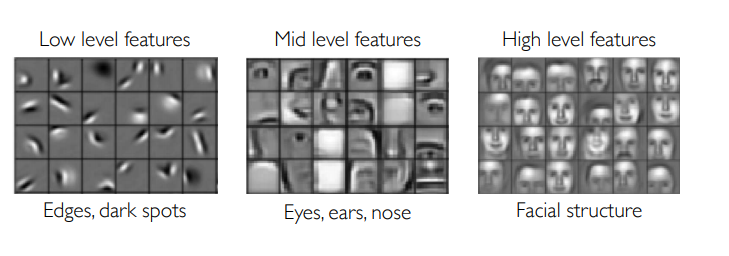


* Pueden aprender de **distintos formatos** de datos: tablas, grafos, imágenes, etc.



Para resolver un problema de deep learning, es necesario definir al menos tres aspectos fundamentales:

**1) MODELO:** es la función que va a establecer la conexión entre las variables de entrada con la/s variables de salida.

**2) OPTIMIZADOR:** es el algorítmo con el que se van a ir actualizando los pesos de mi modelo, por lo que es este punto el que le dá la capacidad de aprendizaje a la red.

**3) FUNCIÓN DE COSTO:** es la función mediante la cual voy a evaluar el desempeño de mi modelo y según el tipo de problema que se este abordando, las funciones de costo también cambian. Por ejemplo para problemas de clasificación binaria podemos utilizar la binary cross-entropy (BCE), para problemas de clasificación multiclase la cross-entropy o KL-divergence, para regresión el mean squared error (MSE), entre otras.



La unidad elemental de una red neuronal es la neurona. Esta se encarga de recibir múltiples entradas, relacionándolas mediante una función lineal para luego pasar por una función de activación y generar la salidad de la neurona. Esta función de activación es la que aporta la no-linealidad que caracteriza este tipo de modelos. En este caso podemos mencionar la ReLU, leaky ReLU, tangente hiperbólica, sigmoide, etc.

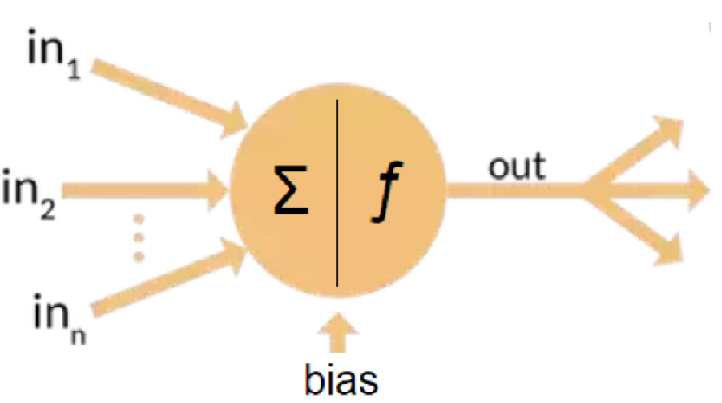


Algunas particularidades de un problema de deep learning:

* **Trabajo con el dataset en DL.**

Por lo general en un problema de machine learning (ML) para realizar la búsqueda de hiper-parámetros (HPs) se realiza cross-validation utilizando k-folds por ejemplo, en donde se entrenan varios modelos para poder promediar las métricas y ver con que HPs el modelo se comportó mejor.
En DL, como entrenar tantos modelos es mucho más costoso, se simplifica este proceso dividiendo el dataset en 3 partes: train, validation y test. Entonces se entrena el modelo con el train y sobre el validation se prueban los distintos HPs que se están ajustando, para finalmente realizar la última prueba sobre el test.

* **En DL se deben normalizar los datos.**

No por un requerimiento específico del algorítmo de optimización que se utilice, si no para agilizar el proceso de aprendizaje. En caso de no normalizar los datos, la activación correspondiente a un valor de entrada muy grande podría generar que necesitemos elegir un learning rate muy chico para que el gradiente no explote (problema conocido como exploding gradients). De esta manera afectamos el aprendizaje de otros pesos que van a actualizarse en menor medida cuando la entrada sea chica.

* **Problema de vanishing gradients.**

El problema de vanishing gradient puede suceder en una red lo suficientemente profunda como para que la multiplicación de las sucesivas derivadas parciales que conforman el método de back-propagation se aproxime a 0. Suponiendo que se está trabajando con una función de activación sigmoid por ejemplo, cuando se calcula la derivada para un valor de la función de activación muy cercano a 0 o a 1, la derivada es muy próxima a 0. Para solucionar este problema se pueden seleccionar otro tipo de funciones de activación como por ejemplo una leaky ReLU, en donde la derivada para valores mayores de 0 es 1 y para valores menores que 0 es un valor beta, ajustable por el usuario.

* **Problema de exploding gradients.**

Este problema aparece ya que es frecuente que las funciones de costo en función de los diversos parámetros de un modelo de DL presenten zonas donde el gradiente crece de forma abrupta. Al crecer de manera repentina, esto produce que el proceso de optimización salte a un punto muy alejado del camino de optimización que venía recorriendo. El problema se puede solucionar limitandol os valores que puede tomar el gradiente (gradient clipping).

* **Algorítmos de optimización.**

Los algorítmos de optimización son los que haciendo uso de los gradientes calculados mediante el método de backpropagation, actualizan los pesos. Es decir, son los que le permiten a la red aprender.
Existe 3 tipos de algorítmos de optimización: zero order, first order y second order.
Para los algorítmos de primer y segundo órden, asumimos que la función de costo es continua y derivable (casi) en todos los puntos.
Dentro de los algorítmos de primer orden podemos encontrar el SGD y derivaciones del mismo como ADAM, RMSPROP, Mini Batch, etc.
Los algorítmos de segundo órden son los algorítmos basados en métodos de Newton que tienen en cuenta la curvatura del gradiente, por lo que necesitan la derivada segunda del gradiente.

Cuando la función de costo no es continua o no la conocemos, se utilizan algoritmos de orden cero, en donde se intenta descubrir como es esa función de costo sin la necesidad de calcular el gradiente 

------------------------------------------------------
---------------------------------------------------------

A continuación se realiza la implementación del algorítmo de SGD para encontrar el mínimo de forma numérica de una determinada función y(x)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# STOCHASTIC GRADIENT DESCENT

In [6]:
# Defino el modelo y(x)
def model(x):
  return ((x - 2) ** 2) + 3

# Defino el gradiente y'(x)
def dy_dx(x):
  return 2 * (x - 2)


Ahora implementamos el algorítmo de optimización, que es el que le permitirá al modelo el aprendizaje. En este caso vamos a utilizar el SGD que es un caso particular del algorítmo de mini-batch para un batch size igual a 1, para eso recordemos el pseudo código del algorítmo:


for e in **epochs**:
> for b in **batches**:
>>Paso **forward**
>>
>>Cálculo del gradiente
>>
>>Actualización de los pesos


In [86]:
# Defino el loop de entrenamiento

def training_loop(x_0, lr, n_epochs, patience, tolerance, momentum_1 = False, p1 = 0, momentum_2 = False, p2 = 0):
  x = x_0
  patience_count = 0
  print_flag = True
  v = np.random.uniform(0, 10)
  r = np.random.uniform(0, 10)
  history = []
  for e in np.arange(0, n_epochs):
    # Forward
    y_min = model(x)
   
    # Cálculo del gradiente
    grad = dy_dx(x)

    # Guardo los valores para graficar
    history.append(grad)

    # Actualizo el valor de x
    if momentum_1:
      # Momento de primer orden
      if print_flag: 
        print('Momento de primer órden')
        print_flag = False
      v = p1 * v + lr * grad
      x = x - v
    elif momentum_2:
      # Momento de segundo orden
      if print_flag: 
        print('Momento de segundo órden')
        print_flag = False
      v = p1 * v + (1 - p1) * grad
      r = p2 * r + (1 - p2) * grad * grad
      delta = -(lr / np.sqrt(r)) * v
      x = x + delta      
    else:
      # Actualización sin m1 ni m2
      if print_flag: 
        print('Actualización clásica')
        print_flag = False
      x = x - lr * grad

    # Early stopping
    if y_min - model(x) < tolerance:
      patience_count += 1
    else: patience_count = 0

    if (e % 10) == 0:
      print ('Epoch: %i | El valor de x es %f | La diferencia entre y_n e y_n-1 es %f' %(e, x, y_min - model(x)))
      print_flag = True

    if (patience_count >= patience) | (e >= n_epochs):
      y_min = model(x)
      break
  return history

In [87]:
# Defino hiper-parámetros del entrenamiento
learning_rate = 0.01
epochs = 5000
patience_n = 50
tolerance_c = 0.00000001

history_clas = training_loop(50, learning_rate, epochs, patience_n, tolerance_c)

Actualización clásica
Epoch: 0 | El valor de x es 49.040000 | La diferencia entre y_n e y_n-1 es 91.238400
Actualización clásica
Epoch: 10 | El valor de x es 40.435105 | La diferencia entre y_n e y_n-1 es 60.911483
Actualización clásica
Epoch: 20 | El valor de x es 33.404279 | La diferencia entre y_n e y_n-1 es 40.664992
Actualización clásica
Epoch: 30 | El valor de x es 27.659582 | La diferencia entre y_n e y_n-1 es 27.148273
Actualización clásica
Epoch: 40 | El valor de x es 22.965747 | La diferencia entre y_n e y_n-1 es 18.124403
Actualización clásica
Epoch: 50 | El valor de x es 19.130542 | La diferencia entre y_n e y_n-1 es 12.099996
Actualización clásica
Epoch: 60 | El valor de x es 15.996900 | La diferencia entre y_n e y_n-1 es 8.078054
Actualización clásica
Epoch: 70 | El valor de x es 13.436486 | La diferencia entre y_n e y_n-1 es 5.392973
Actualización clásica
Epoch: 80 | El valor de x es 11.344442 | La diferencia entre y_n e y_n-1 es 3.600392
Actualización clásica
Epoch: 90 

## MOMENTO DE PRIMER ÓRDEN

In [88]:
# Defino hiper-parámetros del entrenamiento
learning_rate = 0.01
epochs = 5000
patience_n = 50
tolerance_c = 0.00000001

history_1m = training_loop(50, learning_rate, epochs, patience_n, tolerance_c, momentum_1 = True, p1 = 0.5)

Momento de primer órden
Epoch: 0 | El valor de x es 44.977315 | La diferencia entre y_n e y_n-1 es 456.950432
Momento de primer órden
Epoch: 10 | El valor de x es 27.687374 | La diferencia entre y_n e y_n-1 es 59.116042
Momento de primer órden
Epoch: 20 | El valor de x es 18.752266 | La diferencia entre y_n e y_n-1 es 25.035575
Momento de primer órden
Epoch: 30 | El valor de x es 12.927436 | La diferencia entre y_n e y_n-1 es 10.652284
Momento de primer órden
Epoch: 40 | El valor de x es 9.127926 | La diferencia entre y_n e y_n-1 es 4.532445
Momento de primer órden
Epoch: 50 | El valor de x es 6.649520 | La diferencia entre y_n e y_n-1 es 1.928512
Momento de primer órden
Epoch: 60 | El valor de x es 5.032865 | La diferencia entre y_n e y_n-1 es 0.820564
Momento de primer órden
Epoch: 70 | El valor de x es 3.978326 | La diferencia entre y_n e y_n-1 es 0.349142
Momento de primer órden
Epoch: 80 | El valor de x es 3.290455 | La diferencia entre y_n e y_n-1 es 0.148557
Momento de primer ór

## MOMENTO DE SEGUNDO ÓRDEN

In [92]:
# Defino hiper-parámetros del entrenamiento
learning_rate = 1
epochs = 5000
patience_n = 50
tolerance_c = 0.00000001

history_2m = training_loop(50, learning_rate, epochs, patience_n, tolerance_c, momentum_1 = False, p1 = 0.1, momentum_2 = True, p2 = 0.9)

Momento de segundo órden
Epoch: 0 | El valor de x es 47.146555 | La diferencia entre y_n e y_n-1 es 265.788598
Momento de segundo órden
Epoch: 10 | El valor de x es 33.077751 | La diferencia entre y_n e y_n-1 es 65.530756
Momento de segundo órden
Epoch: 20 | El valor de x es 24.064420 | La diferencia entre y_n e y_n-1 es 36.882559
Momento de segundo órden
Epoch: 30 | El valor de x es 16.562954 | La diferencia entre y_n e y_n-1 es 20.746802
Momento de segundo órden
Epoch: 40 | El valor de x es 10.308717 | La diferencia entre y_n e y_n-1 es 9.676785
Momento de segundo órden
Epoch: 50 | El valor de x es 5.607876 | La diferencia entre y_n e y_n-1 es 2.932441
Momento de segundo órden
Epoch: 60 | El valor de x es 2.918212 | La diferencia entre y_n e y_n-1 es 0.348833
Momento de segundo órden
Epoch: 70 | El valor de x es 2.079520 | La diferencia entre y_n e y_n-1 es 0.005652
Momento de segundo órden
Epoch: 80 | El valor de x es 2.000632 | La diferencia entre y_n e y_n-1 es 0.000001
Momento de

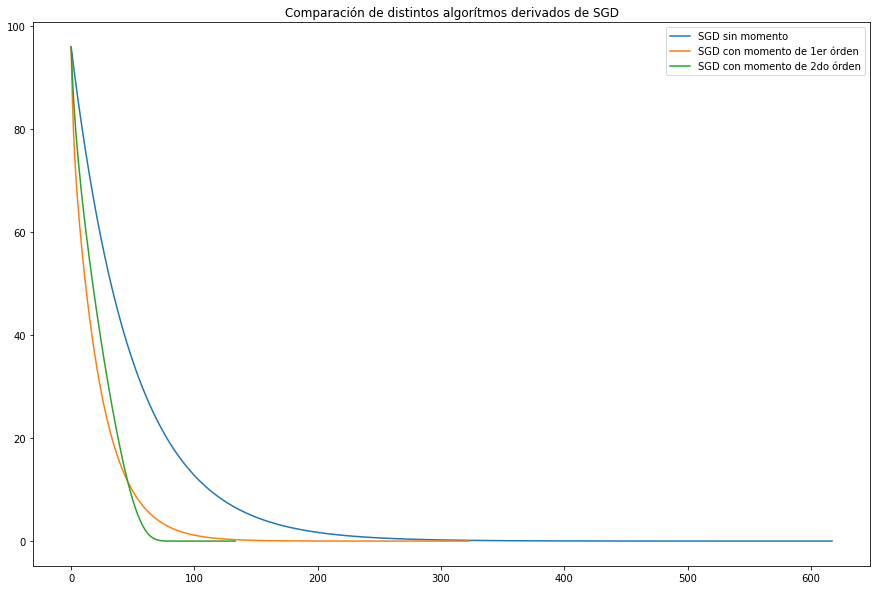

In [99]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.plot(history_clas, label = 'SGD sin momento')
plt.plot(history_1m, label = 'SGD con momento de 1er órden')
plt.plot(history_2m, label = 'SGD con momento de 2do órden')
plt.title('Comparación de distintos algorítmos derivados de SGD')
plt.legend()

# **BACK PROPAGATION Y REGLA DE LA CADENA**

>Diferenciación automática: para el grafo de cómputo que se muestra en la siguiente imagen, con *a = 1, b = 2* y *c = 3*, calcular el valor final de *Y* y la derivada de *Y* respecto a cada una de las entradas (*a, b* y *c*). Para hacer el cálculo primero realizar el paso forward y luego utilizar backpropagation con la regla de la cadena.


Primero creo los tensores que van a ser las hojas de mi grafo de cómputo. Como me interesa calcular los gradientes de la salida *y* en función de estas variables, les especifico *requires_grad = True*.

In [27]:
# Creo tensores
a = torch.tensor(1., requires_grad=True)
b = torch.tensor(2., requires_grad=True)
c = torch.tensor(3., requires_grad=True)

 # Realizo las operaciones
d = a + b
e = b - c
y = d * e

# Calculo el gradiente de y
y.backward()

# Con nombre_de_hoja.grad accedo al calculo del gradiente de cada hoja de mi grafo.
print(a.grad)    # a.grad = -1
print(b.grad)    # b.grad = 2
print(c.grad)    # c.grad = -3 

tensor(-1.)
tensor(2.)
tensor(-3.)


Para visualizar el gráfo de cómputo podemos utilizar la extención **torchviz** que con la función *make_dot* nos genera una representación gráfica.

In [ ]:
!pip install torchviz
from torchviz import make_dot

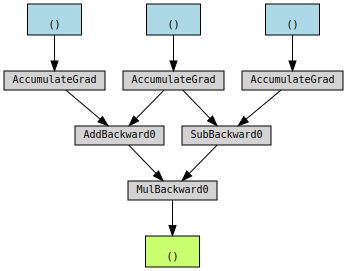

In [26]:
make_dot(y)

# EJERCICIO 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch

Creación de dataset sintético utilizando la clase dataset

In [5]:
class Make_Data(Dataset):
    
    # Constructor
    def __init__(self, N_s=10000):
        print('Make_Data __Init__ called')
        # Genero X
        X = np.random.uniform(0,10, N_s)
        self.X = torch.from_numpy(X)
        
        # Genero y
        N = np.random.normal(0,0.2)
        y = (X - 2)**2 + 3 + N
        self.y = torch.from_numpy(y)

        # Almacno len
        self.len = N_s

    # Getter
    def __getitem__(self, index):    
        return self.X[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_stuff(self):
        # plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.X[:].numpy(), self.y[:].numpy(), 'o')
        plt.title('Data')
        plt.legend()

In [6]:
trainset = Make_Data(N_s = 8000)
testset = Make_Data(N_s = 2000)

Make_Data __Init__ called
Make_Data __Init__ called


No handles with labels found to put in legend.


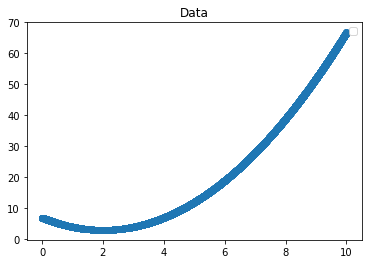

In [112]:
trainset.plot_stuff()

No handles with labels found to put in legend.


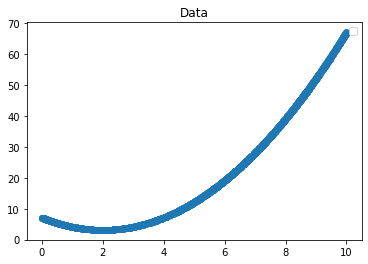

In [113]:
testset.plot_stuff()

## Implementación de SGD

In [10]:
def model(x, w1, w2, w3):
  return w1 * x.pow(2) + w2 * x + w3

def loss_fn(y_hat, y, l2 = 0.5, l1 = False):
    squared_diffs = (y_hat - y) ** 2
    if l2:
      squared_diffs = squared_diffs + l2 * params.pow(2).sum()
    
    if l1:
      squared_diffs = squared_diffs + l1 * abs(params).sum()
    return squared_diffs.mean()

def training_loop(trainset, model, criterion, train_loader, optimizer, n_epochs, params, print_number = 100):
                  
  #batches = round(trainset.len / batch_size)  # Calculo la cantidad de batches
  cost = []
  for epoch in range(1, n_epochs + 1):
    total = 0
    for x, y in train_loader:
      optimizer.zero_grad()       # Limpio los gradientes
      y_hat = model(x, *params)   # Forward
      loss = criterion(y_hat, y)  # Calculo función de costo
      loss.backward()             # Calculo el gradiente de la función de costo
      optimizer.step()            # Actualizo los pesos 
      total += loss.item()          # Almaceno el costo en esta iteración

    cost.append(total)

    if epoch % print_number == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params, cost

def calc_forward(X_, y_, is_train):
    with torch.set_grad_enabled(is_train):
        y_hat_ = model(X_, *params)
        loss = loss_fn(y_hat_, y_)
    return loss

In [7]:
import torch.optim as optim

batch_size = 4000

train_dataloader = DataLoader(trainset, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(testset, batch_size = batch_size, shuffle = True)


In [8]:
learning_rate = 0.0001
n_epochs = 1000
criterion = nn.MSELoss()
params_np = np.random.uniform(0, 1, (3))
params = torch.tensor([params_np[0], params_np[1], params_np[2]], requires_grad=True) # requires_grad para poder calcular el gradiente en función de estos parámetros
optimizer = optim.SGD([params], lr = learning_rate)

opt_params, history = training_loop(trainset, model, loss_fn, train_dataloader, optimizer, n_epochs, params, print_number = 50)

Epoch 50, Loss 15.669492
Epoch 100, Loss 14.554878
Epoch 150, Loss 13.874668
Epoch 200, Loss 12.720839
Epoch 250, Loss 12.440011
Epoch 300, Loss 11.476816
Epoch 350, Loss 10.848413
Epoch 400, Loss 10.502638
Epoch 450, Loss 9.925059
Epoch 500, Loss 9.641644
Epoch 550, Loss 9.098946
Epoch 600, Loss 8.643090
Epoch 650, Loss 8.279092
Epoch 700, Loss 8.120416
Epoch 750, Loss 7.796356
Epoch 800, Loss 7.517391
Epoch 850, Loss 7.197837
Epoch 900, Loss 7.217878
Epoch 950, Loss 6.732580
Epoch 1000, Loss 6.625561


In [9]:
loss_test = calc_forward(testset[:][0], testset[:][1], False)
print('Testset loss: %f' %(loss_test))

Testset loss: 6.754748


## Con regularización l2 (lambda: 0.5)

In [11]:
learning_rate = 0.0001
n_epochs = 1000
criterion = nn.MSELoss()
params_np = np.random.uniform(0, 1, (3))
params = torch.tensor([params_np[0], params_np[1], params_np[2]], requires_grad=True) # requires_grad para poder calcular el gradiente en función de estos parámetros
optimizer = optim.SGD([params], lr = learning_rate)

opt_params, history_l2 = training_loop(trainset, model, loss_fn, train_dataloader, optimizer, n_epochs, params, print_number = 50)

Epoch 50, Loss 12.410776
Epoch 100, Loss 11.579949
Epoch 150, Loss 11.145296
Epoch 200, Loss 10.396788
Epoch 250, Loss 10.121160
Epoch 300, Loss 9.510853
Epoch 350, Loss 9.411863
Epoch 400, Loss 9.030918
Epoch 450, Loss 8.547361
Epoch 500, Loss 8.191954
Epoch 550, Loss 7.854453
Epoch 600, Loss 7.562696
Epoch 650, Loss 7.386396
Epoch 700, Loss 7.276016
Epoch 750, Loss 7.158575
Epoch 800, Loss 7.036774
Epoch 850, Loss 6.979040
Epoch 900, Loss 6.859508
Epoch 950, Loss 6.835715
Epoch 1000, Loss 6.556768


In [12]:
loss_test = calc_forward(testset[:][0], testset[:][1], False)
print('Testset loss: %f' %(loss_test))

Testset loss: 6.733762


# IMPLEMENTACIÓN DE RNA MLP CON PYTORCH

In [52]:
import torch.optim as optim
import torch.nn.functional as F
from sklearn import metrics

## Definición de dataset

In [43]:
class Make_Data(Dataset):
    
    # Constructor
    def __init__(self, N_s=10000):
        print('Make_Data __Init__ called')
        # Genero X
        X = np.random.uniform(0,10, N_s)
        self.X = torch.from_numpy(X).float()
        self.X = self.X.view(-1, 1)
        
        # Genero y
        N = np.random.normal(0,0.2)
        y = (X - 2)**2 + 3 + N
        self.y = torch.from_numpy(y).float()
        self.y = self.y.view(-1, 1)

        # Almacno len
        self.len = N_s

    # Getter
    def __getitem__(self, index):    
        return self.X[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_stuff(self):
        # plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.X[:].numpy(), self.y[:].numpy(), 'o')
        plt.title('Data')
        plt.legend()

## Llamado a dataloaders

In [72]:
train_set = Make_Data(N_s = 7000)
validation_set = Make_Data(N_s = 2000)
test_set = Make_Data(N_s = 1000)


training_dataloader = DataLoader(train_set, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=128, shuffle=True)

Make_Data __Init__ called
Make_Data __Init__ called
Make_Data __Init__ called


## Creación del modelo con dropout

In [73]:
# Create the class for model

class Net(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden, out_size, p=0):
        super(Net, self).__init__()
        self.drop = nn.Dropout(p=p)
        self.linear1 = nn.Linear(in_size, n_hidden)
        self.linear2 = nn.Linear(n_hidden, n_hidden)
        self.linear3 = nn.Linear(n_hidden, out_size)
        
    def forward(self, x):
        x = F.relu(self.drop(self.linear1(x)))
        x = F.relu(self.drop(self.linear2(x)))
        x = self.linear3(x)
        return x

In [108]:
nnet = Net(in_size = 1, n_hidden = 300, out_size = 1)

## Optimizador y loss (criterion)

In [109]:
# Set the optimizer and criterion function

optimizer = optim.SGD(nnet.parameters(), lr=0.0001)
criterion = nn.MSELoss()

## Training loop

In [110]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

nnet.to(device)

for epoch in range(100):

    running_loss = 0
    history_loss_train = []            
    history_loss_val = []               
    nnet.train()
    for i, data in enumerate(training_dataloader):

        # batch
        x, y = data
        x = x.to(device).float()
        y = y.to(device).float().reshape(-1,1)

        # set gradient to zero
        optimizer.zero_grad()

        # forward 
        y_hat = nnet(x)

        # loss
        loss = criterion(y_hat, y)

        # backward
        loss.backward()

        # update of parameters
        optimizer.step()

        # compute metrics and statistics
        running_loss += loss.item()
        ##history_loss_train.append(running_loss)           
    
    nnet.eval()
    with torch.no_grad():
        nnet_test_scores = []
        truth = []
        for i, data in enumerate(test_dataloader):
            # batch
            x, y = data
            x = x.to(device).float()
            y = y.to(device).float().reshape(-1,1)

            # forward 
            y_hat = nnet(x)
            #y_hat = torch.sigmoid(y_hat)

            # accumulate data
            truth += list(y.detach().numpy()) 
            nnet_test_scores += list(y_hat.detach().numpy())
            mse_val = metrics.mean_squared_error(truth,nnet_test_scores)

        history_loss_val.append(criterion(nnet(validation_set.X), validation_set.y).item())                

        mse_metric = metrics.mean_squared_error(truth,nnet_test_scores)   
        print(f"Epoch = {epoch} | loss = {running_loss} | mse = {mse_metric}")

Epoch = 0 | loss = 6682.718116760254 | mse = 80.90515899658203
Epoch = 1 | loss = 4142.752490997314 | mse = 75.60928344726562
Epoch = 2 | loss = 3847.218116760254 | mse = 68.35804748535156
Epoch = 3 | loss = 3543.6375465393066 | mse = 63.24464797973633
Epoch = 4 | loss = 3215.1720581054688 | mse = 57.96761703491211
Epoch = 5 | loss = 2900.260757446289 | mse = 51.38697814941406
Epoch = 6 | loss = 2574.954360961914 | mse = 44.83740997314453
Epoch = 7 | loss = 2270.264865875244 | mse = 43.754459381103516
Epoch = 8 | loss = 2012.7600479125977 | mse = 35.549407958984375
Epoch = 9 | loss = 1754.6903800964355 | mse = 29.814844131469727
Epoch = 10 | loss = 1532.4201030731201 | mse = 26.058958053588867
Epoch = 11 | loss = 1326.8228492736816 | mse = 28.282094955444336
Epoch = 12 | loss = 1180.436017036438 | mse = 21.77724266052246
Epoch = 13 | loss = 1015.9588890075684 | mse = 18.66373634338379
Epoch = 14 | loss = 913.4432506561279 | mse = 15.583137512207031
Epoch = 15 | loss = 811.1253747940063

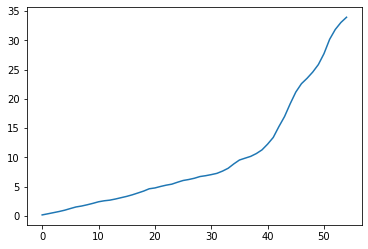

In [111]:
plt.subplots(1, 1)
plt.plot(history_loss_train)
plt.plot(history_loss_val)